# Initialization

In [1]:
# Autogenerated on 15:52:58 2016/01/25
# Regen Command:
#    /home/zach/envs/thesis/ibeis/ibeis/__main__.py --tf autogen_ipynb --db humpbacks --ipynb -t default:proot=BC_DTW -a default:has_any=hasnotch
#
# Matplotlib stuff
import matplotlib as mpl
%matplotlib inline
%load_ext autoreload
%autoreload

# Set global utool flags
import utool as ut
ut.util_io.__PRINT_WRITES__ = False
ut.util_io.__PRINT_READS__ = False
ut.util_parallel.__FORCE_SERIAL__ = True
ut.util_cache.VERBOSE_CACHE = False
ut.NOT_QUIET = False

import plottool as pt
fix_figsize = ut.partial(pt.set_figsize, w=30, h=10, dpi=256)

draw_case_kw = dict(show_in_notebook=True, annot_modes=[0, 1])

# Setup database specific parameter configurations
db = 'humpbacks_fb'

# Pick one of the following annotation configurations
# to choose the query and database annotations
a = [
    #'default:has_any=hasnotch,mingt=2',
    'default:has_any=hasnotch,mingt=2',
    #'default:qmingt=2',
    #'default:has_any=hasnotch,mingt=2,size=50',
    # See ibeis/expt/annotation_configs.py for names of annot configuration options
    #'default:has_any=(query,),dpername=1,exclude_reference=True',
    #'default:is_known=True',
    #'default:qsame_imageset=True,been_adjusted=True,excluderef=True'
    #'default:qsame_imageset=True,been_adjusted=True,excluderef=True,qsize=10,dsize=20',
    #'default:require_timestamp=True,min_timedelta=3600',
    #'default:species=primary',
    #'timectrl:',
    #'timectrl:been_adjusted=True,dpername=3',
    #'timectrl:qsize=10,dsize=20',
    #'unctrl:been_adjusted=True',
]

# Set to override any special configs
qaid_override = None
daid_override = None

# Uncomment one or more of the following pipeline configurations to choose
# how the algorithm will run.  If multiple configurations are chosen, they
# will be compared in the histograms, but only the first configuration will
# be used for inspecting results.
#crop_dim_sizes = [(500,50), (500,500)]
t = [
    #'default:proot=BC_DTW,decision=max,crop_dim_size=500,crop_enabled=True,manual_extract=False,use_te_scorer=True,\
    #te_score_weight=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]',
    #'default:proot=BC_DTW',
    'default:proot=BC_DTW,decision=max,crop_dim_size=500,crop_enabled=True,manual_extract=False,\
use_te_scorer=True,ignore_notch=True,te_score_weight=[0.75,0.5,0.25,0.1],te_net=fbannot_jet',
    #'default:proot=vsmany'
    #'default:proot=BC_DTW,decision=[max,average],crop_dim_size=1000,crop_enabled=True,manual_extract=True,\
    #use_te_scorer=True,ignore_notch=False',
    #'default:proot=BC_DTW,decision=max,crop_dim_size=500,crop_enabled=True,manual_extract=False,\
    #use_te_scorer=False,ignore_notch=True,te_score_weight=0.5',
    #'default:proot=BC_DTW,decision=max,crop_dim_size=500,crop_enabled=True,manual_extract=True'
    #for sz, w in crop_dim_sizes # this will take a while
    #'default:proot=vsmany',
    #'default',
    #'default:K=1',
    #'default:K=1,AI=False',
    #'default:K=1,AI=False,QRH=True',
    #'default:K=1,RI=True,AI=False',
    #'default:K=1,adapteq=True',
    #'default:fg_on=[True,False]',
    
]


# Load database for this test run

#ibeis.expt.experiment_harness.USE_BIG_TEST_CACHE = False
import ibeis

ibs = ibeis.opendb(db=db)
#ibs.depc.clear_all()

# Make notebook cells wider
from IPython.core.display import HTML
HTML("<style>body .container { width:99% !important; }</style>")

[!plotttool] WARNING guitool does not have __PYQT__
Trying /home/zach/envs/thesis/local/lib/python2.7/site-packages/flann-1.8.4-py2.7.egg/pyflann/lib/libflann.so

+------

<!!! WARNING !!!>
[!controller_inject] Missing flask.ext.cas.
To install try pip install git+https://github.com/cameronbwhite/Flask-CAS.git
<type 'exceptions.ImportError'>: No module named flask.ext.cas
</!!! WARNING !!!>

L______


Couldn't import dot_parser, loading of dot files will not be possible.

/home/zach/envs/thesis/local/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled)



+------

<!!! WARNING !!!>
[!custom_layers] WARNING: GPU seems unavailable
<type 'exceptions.ImportError'>: No module named pylearn2.sandbox.cuda_convnet.filter_acts
</!!! WARNING !!!>

L______


[ibs.__init__] new IBEISController
[ibs._init_dirs] ibs.dbdir = '/home/zach/data/IBEIS/humpbacks_fb'
[depc] INITIALIZE ANNOTATIONS DEPCACHE
[depc.init] Regsitering 12 global preproc funcs
[depc.init] Regsitering 1 global subprops 
[depc] Finished initialization
[ibs.__init__] END new IBEISController




/home/zach/envs/thesis/local/lib/python2.7/site-packages/Theano-0.8.0.dev0-py2.7.egg/theano/tensor/signal/downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")


# Humpback Select

In [2]:
# Tag annotations which have been given manual notch points
from ibeis_flukematch.plugin import *  # NOQA
ibs = ibeis.opendb(defaultdb=db)
all_aids = ibs.get_valid_aids()
isvalid = ibs.depc.get_property('Has_Notch', all_aids, 'flag')
aid_list = ut.compress(all_aids, isvalid)
# Tag the appropriate annots
ibs.append_annot_case_tags(aid_list, ['hasnotch'] * len(aid_list))
#depc = ibs.depc
#qaid_override = aid_list[0:5]
#daid_override = aid_list[0:7]
#print(qaid_override)
#print(daid_override)

# Pipeline Config Info

In [3]:
cfgdict_list, pipecfg_list = ibeis.expt.experiment_helpers.get_pipecfg_list(
    test_cfg_name_list=t, ibs=ibs)
ibeis.expt.experiment_helpers.print_pipe_configs(cfgdict_list, pipecfg_list)

+--- 0 / 4 ===
default:te_score_weight=0.75
BC_DTW(decision=max,weights=None,window=50,version=4)_NotchTip(version=1)_CropChip(sz500,crop_enabled=True,version=2)_TrailingEdge(n_nb5,ign_nTrue,version=5,te_sTrue,w_tes0.75,te_net=fbannot_jet)_BlockCurv(sizes=(5, 10, 15, 20))
L___
+--- 1 / 4 ===
default:te_score_weight=0.5
BC_DTW(decision=max,weights=None,window=50,version=4)_NotchTip(version=1)_CropChip(sz500,crop_enabled=True,version=2)_TrailingEdge(n_nb5,ign_nTrue,version=5,te_sTrue,w_tes0.5,te_net=fbannot_jet)_BlockCurv(sizes=(5, 10, 15, 20))
L___
+--- 2 / 4 ===
default:te_score_weight=0.25
BC_DTW(decision=max,weights=None,window=50,version=4)_NotchTip(version=1)_CropChip(sz500,crop_enabled=True,version=2)_TrailingEdge(n_nb5,ign_nTrue,version=5,te_sTrue,w_tes0.25,te_net=fbannot_jet)_BlockCurv(sizes=(5, 10, 15, 20))
L___
+--- 3 / 4 ===
default:te_score_weight=0.1
BC_DTW(decision=max,weights=None,window=50,version=4)_NotchTip(version=1)_CropChip(sz500,crop_enabled=True,version=2)_Trailin

# Annotation Config Info

In [4]:
acfg_list, expanded_aids_list = ibeis.expt.experiment_helpers.get_annotcfg_list(
    ibs, acfg_name_list=a, qaid_override=qaid_override, daid_override=daid_override, filter_dups=False)
ibeis.expt.annotation_configs.print_acfg_list(acfg_list, expanded_aids_list, ibs, per_qual=True)

+=== <Info acfg_list> ===
non-varied aidcfg = {
    'common': {
        '_cfgindex': 0,
        '_cfgname': 'default',
        '_cfgstr': 'default:has_any=hasnotch,mingt=2',
        'hackerrors': True,
        'has_any': 'hasnotch',
        'min_pername': 2,
        'sample_rule': 'random',
        'sample_rule_ref': 'random',
        'sample_size': 942,
        'shuffle': False,
        'view_ext': 0,
    },
    'dcfg': {
        '_cfgtype': 'dcfg',
    },
    'qcfg': {
        '_cfgtype': 'qcfg',
    },
}
+--- acfg 1 / 1 -- q_cfgname=default d_cfgname=default ---- 
acfg = {}
annot_config_stats = {
    'dbname': humpbacks_fb,
    'num_qaids': 942,
    'num_daids': 942,
    'num_annot_intersect': 942,
    'qaid_stats': {
        'num_qaids': 942,
        'qhashid': _QSUUIDS((942)slrtibxcfzamrorv),
        'qper_name': {max: 6, min: 2, mean: 2.25, std: 0.63, nMin: 346, nMax: 3, shape: (419,), med: 2},
        'qper_qual': {UNKNOWN: 942},
        'qper_vp': {None: 942},
    },
    'daid_

/home/zach/envs/thesis/local/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:227: RuntimeWarning: All-NaN axis encountered
  warnings.warn("All-NaN axis encountered", RuntimeWarning)
/home/zach/envs/thesis/local/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:326: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)


# Timestamp Distribution

[main_helpers] testdata_expanded_aids


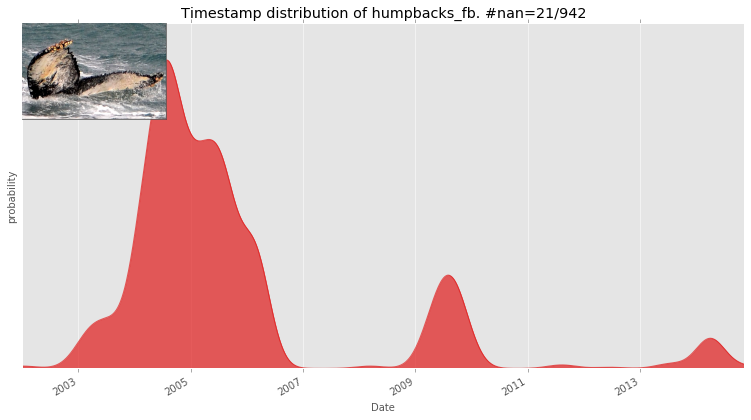

In [5]:
# Get images of those used in the tests
ibs, qaids, daids = ibeis.testdata_expanded_aids(a=a[0], ibs=ibs)
aids = ut.unique(ut.flatten([qaids, daids]))
gids = ut.unique(ibs.get_annot_gids(aids))
# Or just get time delta of all images
#gids = ibs.get_valid_gids()

ibeis.other.dbinfo.show_image_time_distributions(ibs, gids)
#ibeis.other.dbinfo.show_image_time_distributions(ibs, gids)

# Example Annotations / Detections

# Example Name Graph

In [6]:
#from ibeis.viz import viz_graph
#ibs, qaids, daids = ibeis.testdata_expanded_aids(a=a[0], ibs=ibs)
#aids = ut.unique_keep_order(ut.flatten([qaids, daids]))
# Sample some annotations
#aids = ibs.sample_annots_general(aids, filter_kw=dict(sample_size=20, min_pername=2), verbose=False)
# Visualize name graph
#namegraph = viz_graph.make_name_graph_interaction(ibs, aids=aids, zoom=.4)
#fix_figsize()

# Query Accuracy (% correct annotations)

Equivalent Command Line:
ibeis -e rank_cdf --db humpbacks_fb -a default:has_any=hasnotch,mingt=2 -t default:proot=BC_DTW,decision=max,crop_dim_size=500,crop_enabled=True,manual_extract=False,use_te_scorer=True,ignore_notch=True,te_score_weight=[0.75,0.5,0.25,0.1],te_net=fbannot_jet --show
[main_helpers] testdata_expts
testnameid="humpbacks_fb ['default:proot=BC_DTW,decision=max,crop_dim_size=500,crop_enabled=True,manual_extract=False,use_te_scorer=True,ignore_notch=True,te_score_weight=[0.75,0.5,0.25,0.1],te_net=fbannot_jet']['default:has_any=hasnotch,mingt=2']"
annot_cfgstr = QVUUIDS((942)yrnvjbyxvlmujpgn)_DVUUIDS((942)yrnvjbyxvlmujpgn)
pipe_cfgstr= BC_DTW(decision=max,weights=None,window=50,version=4)_NotchTip(version=1)_CropChip(sz500,crop_enabled=True,version=2)_TrailingEdge(n_nb5,ign_nTrue,version=5,te_sTrue,w_tes0.75,te_net=fbannot_jet)_BlockCurv(sizes=(5, 10, 15, 20))
pipe_hashstr = gnofoxiatlqmlqmi
[humpbacks_fb cfg 0/4][req] Executing request <BC_DTW_Request(humpbacks_fb) nQ=9

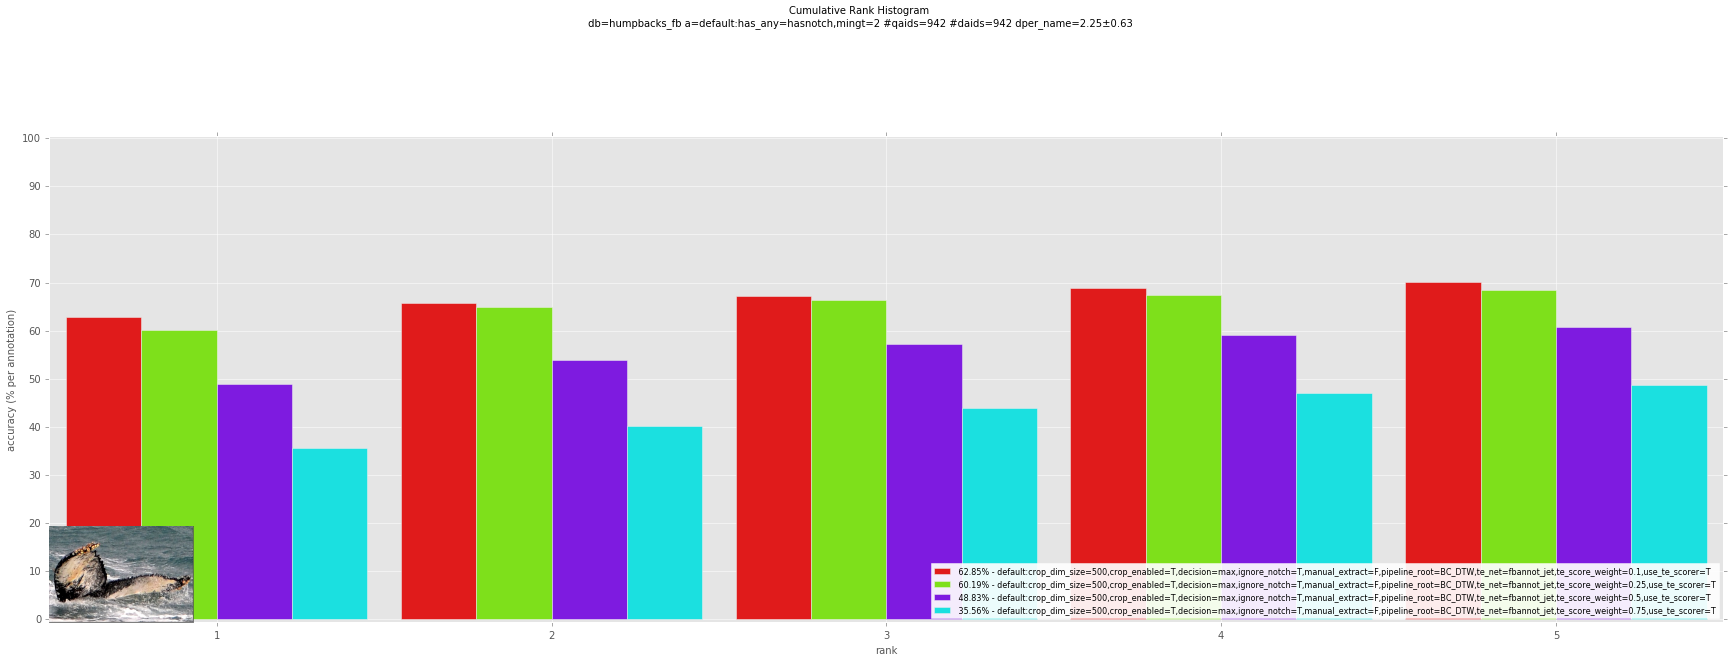

In [7]:
testres = ibeis.run_experiment(
    e='rank_cdf',
    db=db, a=a, t=t, qaid_override=qaid_override, daid_override=daid_override)
#testres.print_unique_annot_config_stats()
_ = testres.draw_func()
fix_figsize()

# Query Accuracy (% correct names)

Equivalent Command Line:
ibeis -e rank_cdf --db humpbacks_fb -a default:has_any=hasnotch,mingt=2 -t default:proot=BC_DTW,decision=max,crop_dim_size=500,crop_enabled=True,manual_extract=False,use_te_scorer=True,ignore_notch=True,te_score_weight=[0.75,0.5,0.25,0.1],te_net=fbannot_jet --show
[main_helpers] testdata_expts
testnameid="humpbacks_fb ['default:proot=BC_DTW,decision=max,crop_dim_size=500,crop_enabled=True,manual_extract=False,use_te_scorer=True,ignore_notch=True,te_score_weight=[0.75,0.5,0.25,0.1],te_net=fbannot_jet']['default:has_any=hasnotch,mingt=2']"
annot_cfgstr = QVUUIDS((942)yrnvjbyxvlmujpgn)_DVUUIDS((942)yrnvjbyxvlmujpgn)
pipe_cfgstr= BC_DTW(decision=max,weights=None,window=50,version=4)_NotchTip(version=1)_CropChip(sz500,crop_enabled=True,version=2)_TrailingEdge(n_nb5,ign_nTrue,version=5,te_sTrue,w_tes0.75,te_net=fbannot_jet)_BlockCurv(sizes=(5, 10, 15, 20))
pipe_hashstr = gnofoxiatlqmlqmi
[humpbacks_fb cfg 0/4][req] Executing request <BC_DTW_Request(humpbacks_fb) nQ=9

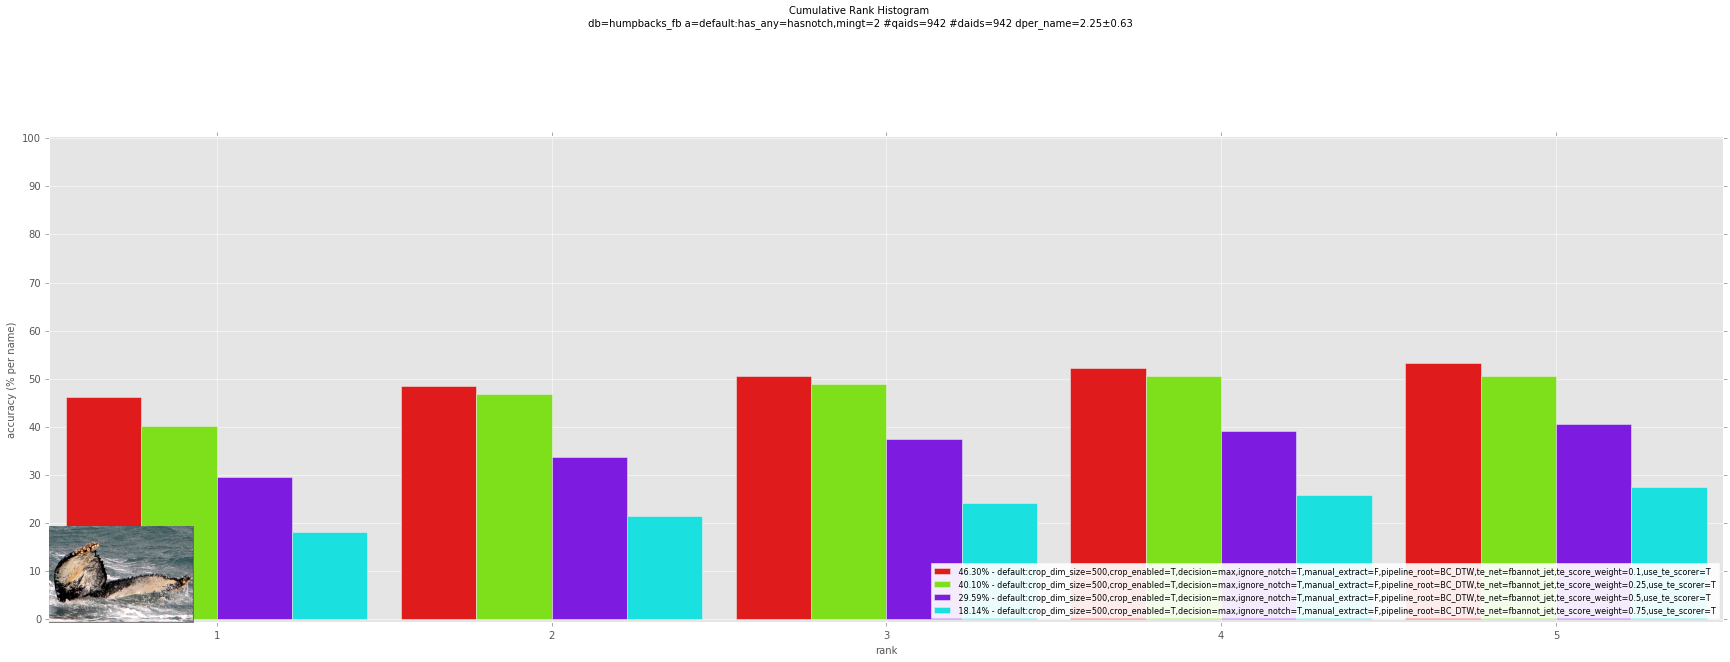

In [8]:
testres = ibeis.run_experiment(
    e='rank_cdf',
    db=db, a=a, t=t, do_per_annot=False, qaid_override=qaid_override, daid_override=daid_override)
#testres.print_unique_annot_config_stats()
_ = testres.draw_func()
fix_figsize()

In [9]:
[i for i in ibs.depc.get_property('Trailing_Edge', testres.cfgx2_qaids[0], 'edge', 
                                               config=testres.cfgx2_qreq_[0].config)][0]


array([[498,  73],
       [497,  75],
       [496,  77],
       [495,  79],
       [494,  81],
       [493,  83],
       [492,  85],
       [491,  87],
       [490,  89],
       [489,  91],
       [488,  93],
       [487,  95],
       [486,  97],
       [485,  99],
       [484, 101],
       [483, 103],
       [482, 105],
       [481, 107],
       [480, 108],
       [479, 108],
       [478, 108],
       [477, 108],
       [476, 108],
       [475, 108],
       [474, 108],
       [473, 108],
       [472, 108],
       [471, 108],
       [470, 108],
       [469, 108],
       [468, 108],
       [467, 108],
       [466, 108],
       [465, 110],
       [464, 110],
       [463, 112],
       [462, 114],
       [461, 114],
       [460, 114],
       [459, 114],
       [458, 114],
       [457, 114],
       [456, 116],
       [455, 116],
       [454, 116],
       [453, 116],
       [452, 116],
       [451, 116],
       [450, 116],
       [449, 116],
       [448, 116],
       [447, 116],
       [446,

# Result Timedelta Distribution

Equivalent Command Line:
ibeis -e timedelta_hist --db humpbacks_fb -a default:has_any=hasnotch,mingt=2 -t default:proot=BC_DTW,decision=max,crop_dim_size=500,crop_enabled=True,manual_extract=False,use_te_scorer=True,ignore_notch=True,te_score_weight=[0.75,0.5,0.25,0.1],te_net=fbannot_jet --show
[main_helpers] testdata_expts
testnameid="humpbacks_fb ['default:proot=BC_DTW,decision=max,crop_dim_size=500,crop_enabled=True,manual_extract=False,use_te_scorer=True,ignore_notch=True,te_score_weight=[0.75,0.5,0.25,0.1],te_net=fbannot_jet']['default:has_any=hasnotch,mingt=2']"
annot_cfgstr = QVUUIDS((942)yrnvjbyxvlmujpgn)_DVUUIDS((942)yrnvjbyxvlmujpgn)
pipe_cfgstr= BC_DTW(decision=max,weights=None,window=50,version=4)_NotchTip(version=1)_CropChip(sz500,crop_enabled=True,version=2)_TrailingEdge(n_nb5,ign_nTrue,version=5,te_sTrue,w_tes0.75,te_net=fbannot_jet)_BlockCurv(sizes=(5, 10, 15, 20))
pipe_hashstr = gnofoxiatlqmlqmi
[humpbacks_fb cfg 0/4][req] Executing request <BC_DTW_Request(humpbacks_fb

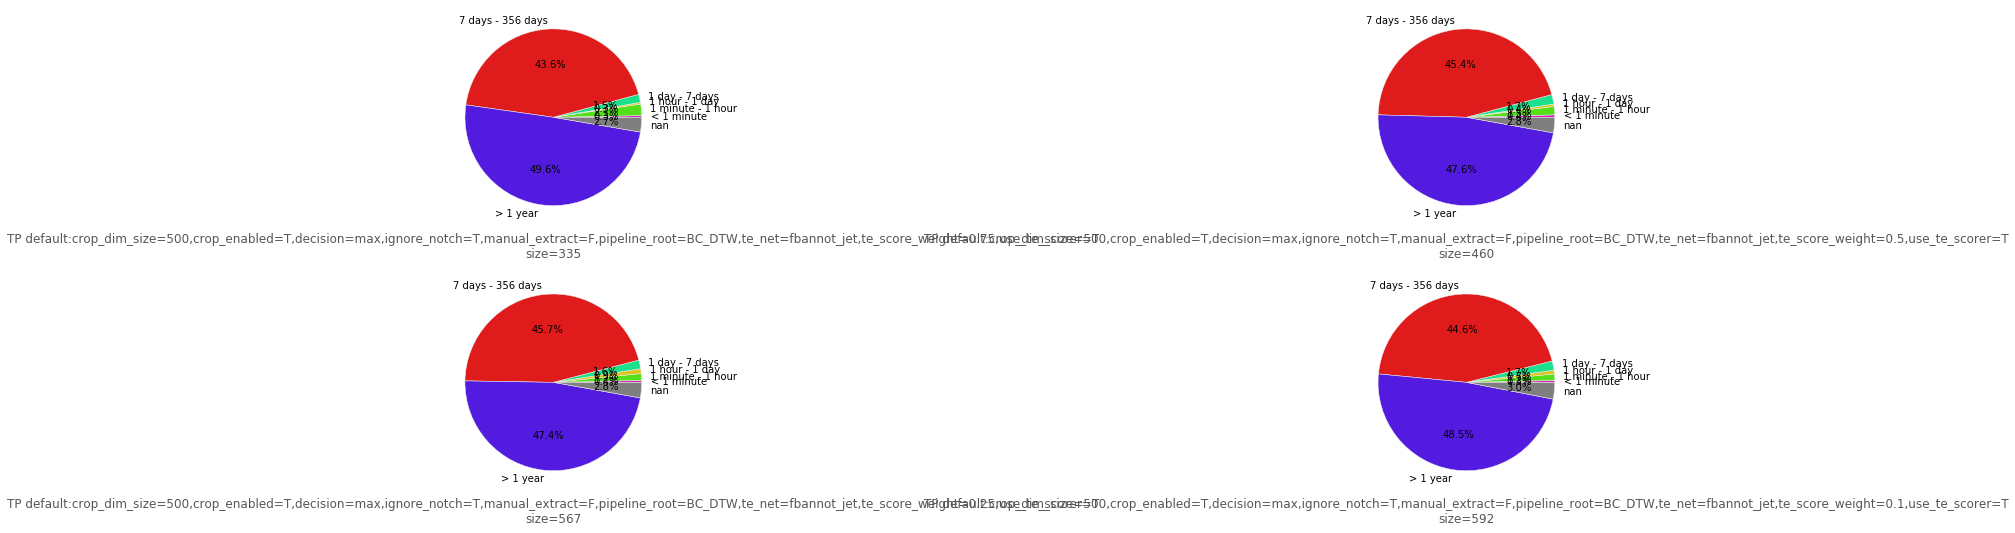

In [10]:
test_result = ibeis.run_experiment(
    e='timedelta_hist',
    db=db,
    a=a[0:1],
    t=t[0:1],
    qaid_override=qaid_override, daid_override=daid_override,
    truepos=True)
test_result.draw_func()
fix_figsize()

# Configuration Overlap

In [11]:
# How well do different configurations compliment each other?
testres.print_config_overlap()

Config Overlap
cfgx1 and cfgx2 have <x> not in common
disjoint_mat =
[[  0 157 244 275]
 [157   0 131 158]
 [244 131   0  69]
 [275 158  69   0]]
cfgx1 helps cfgx2 by <x>
disjoint_mat2 =
[[  0  16   6   9]
 [141   0  12  13]
 [238 119   0  22]
 [266 145  47   0]]
best_cfgx = 3
cfgx 0) has 9 success cases that that the best config does not have -- default:crop_dim_size=500,crop_enabled=True,decision=max,ignore_notch=True,manual_extract=False,pipeline_root=BC_DTW,te_net=fbannot_jet,te_score_weight=0.75,use_te_scorer=True+default:
cfgx 1) has 13 success cases that that the best config does not have -- default:crop_dim_size=500,crop_enabled=True,decision=max,ignore_notch=True,manual_extract=False,pipeline_root=BC_DTW,te_net=fbannot_jet,te_score_weight=0.5,use_te_scorer=True+default:
cfgx 2) has 22 success cases that that the best config does not have -- default:crop_dim_size=500,crop_enabled=True,decision=max,ignore_notch=True,manual_extract=False,pipeline_root=BC_DTW,te_net=fbannot_jet,te

# All Score Distribution

Equivalent Command Line:
ibeis -e scores --db humpbacks_fb -a default:has_any=hasnotch,mingt=2 -t default:proot=BC_DTW,decision=max,crop_dim_size=500,crop_enabled=True,manual_extract=False,use_te_scorer=True,ignore_notch=True,te_score_weight=[0.75,0.5,0.25,0.1],te_net=fbannot_jet -f :fail=None,min_gf_timedelta=None --show
[main_helpers] testdata_expts
testnameid="humpbacks_fb ['default:proot=BC_DTW,decision=max,crop_dim_size=500,crop_enabled=True,manual_extract=False,use_te_scorer=True,ignore_notch=True,te_score_weight=[0.75,0.5,0.25,0.1],te_net=fbannot_jet']['default:has_any=hasnotch,mingt=2']"
annot_cfgstr = QVUUIDS((942)yrnvjbyxvlmujpgn)_DVUUIDS((942)yrnvjbyxvlmujpgn)
pipe_cfgstr= BC_DTW(decision=max,weights=None,window=50,version=4)_NotchTip(version=1)_CropChip(sz500,crop_enabled=True,version=2)_TrailingEdge(n_nb5,ign_nTrue,version=5,te_sTrue,w_tes0.75,te_net=fbannot_jet)_BlockCurv(sizes=(5, 10, 15, 20))
pipe_hashstr = gnofoxiatlqmlqmi
[humpbacks_fb cfg 0/4][req] Executing request 

AssertionError: can only specify one config here

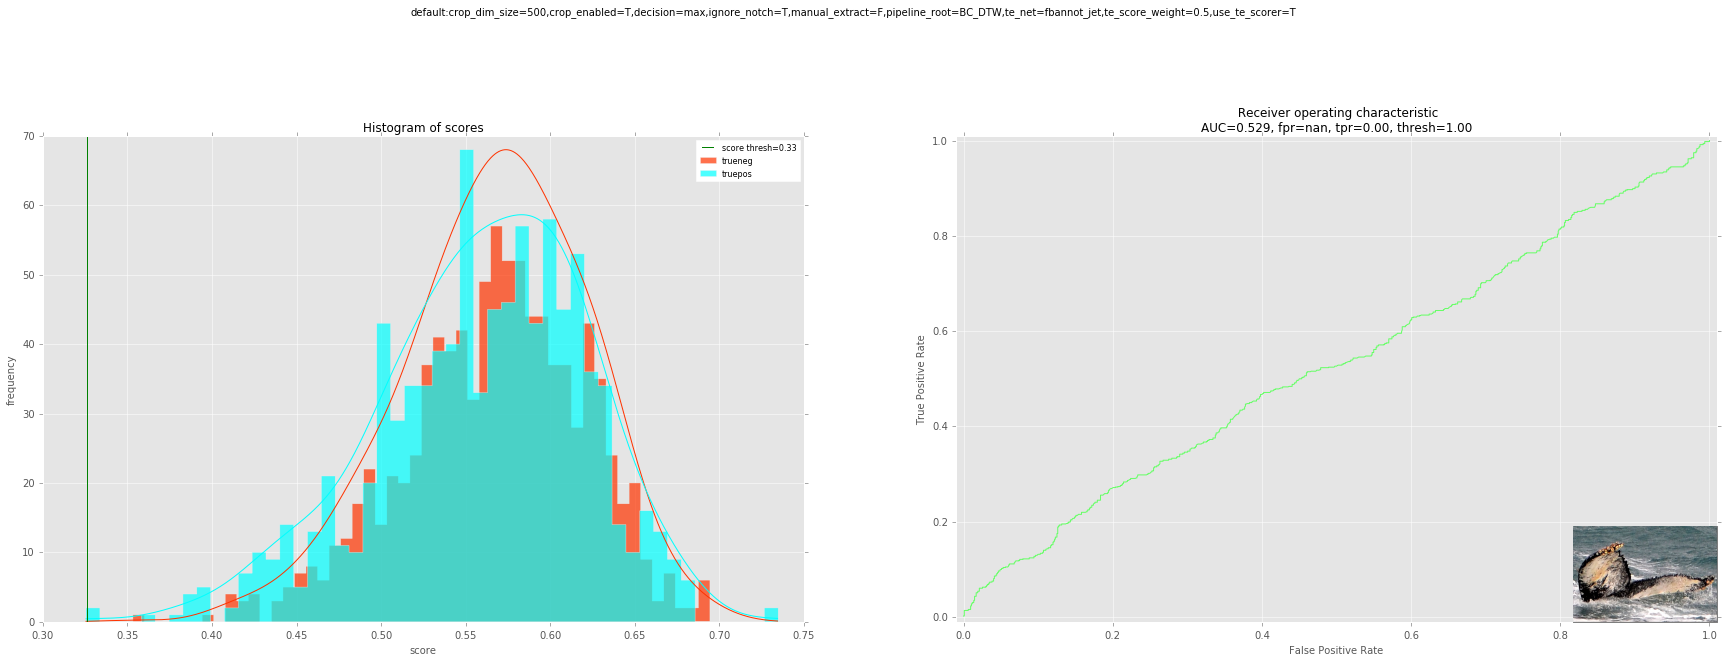

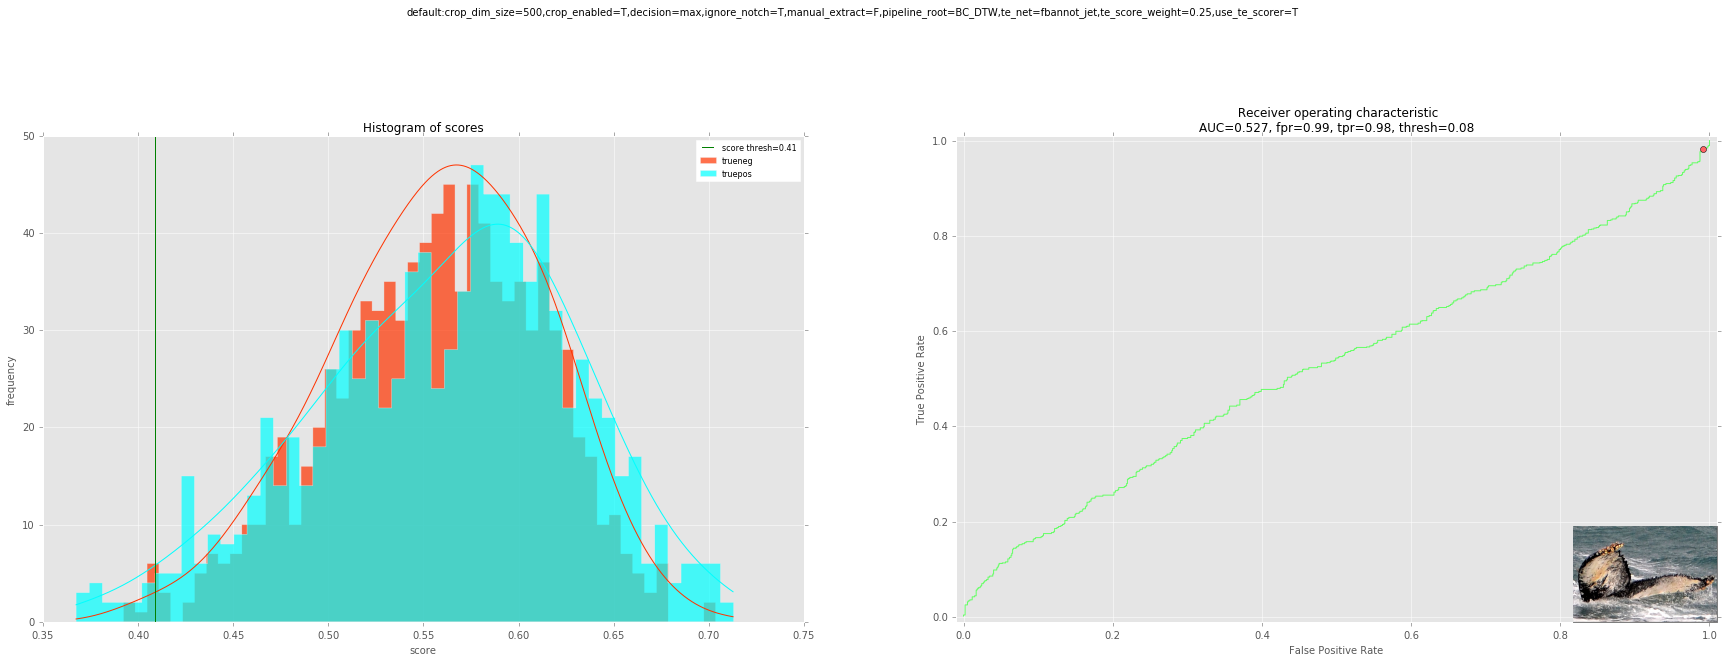

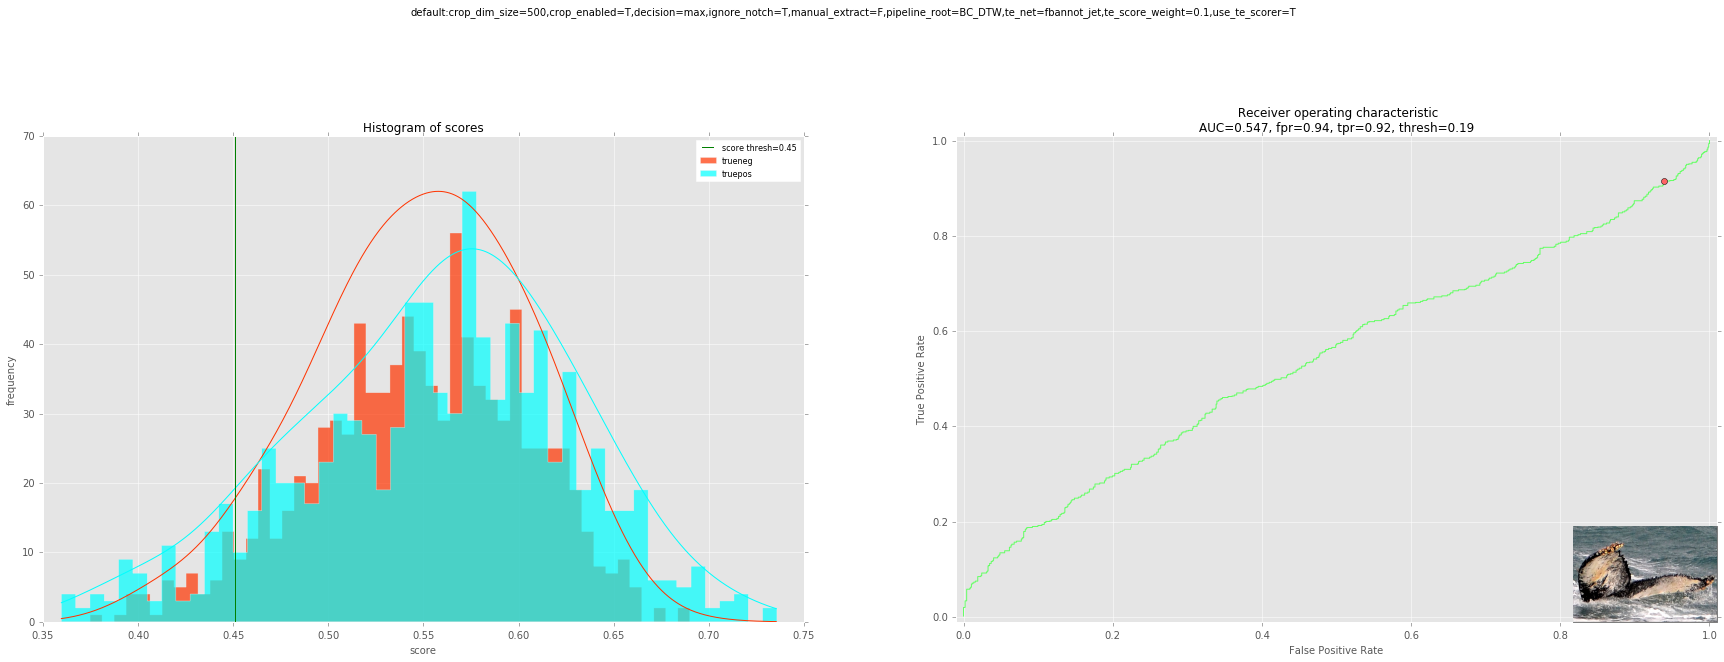

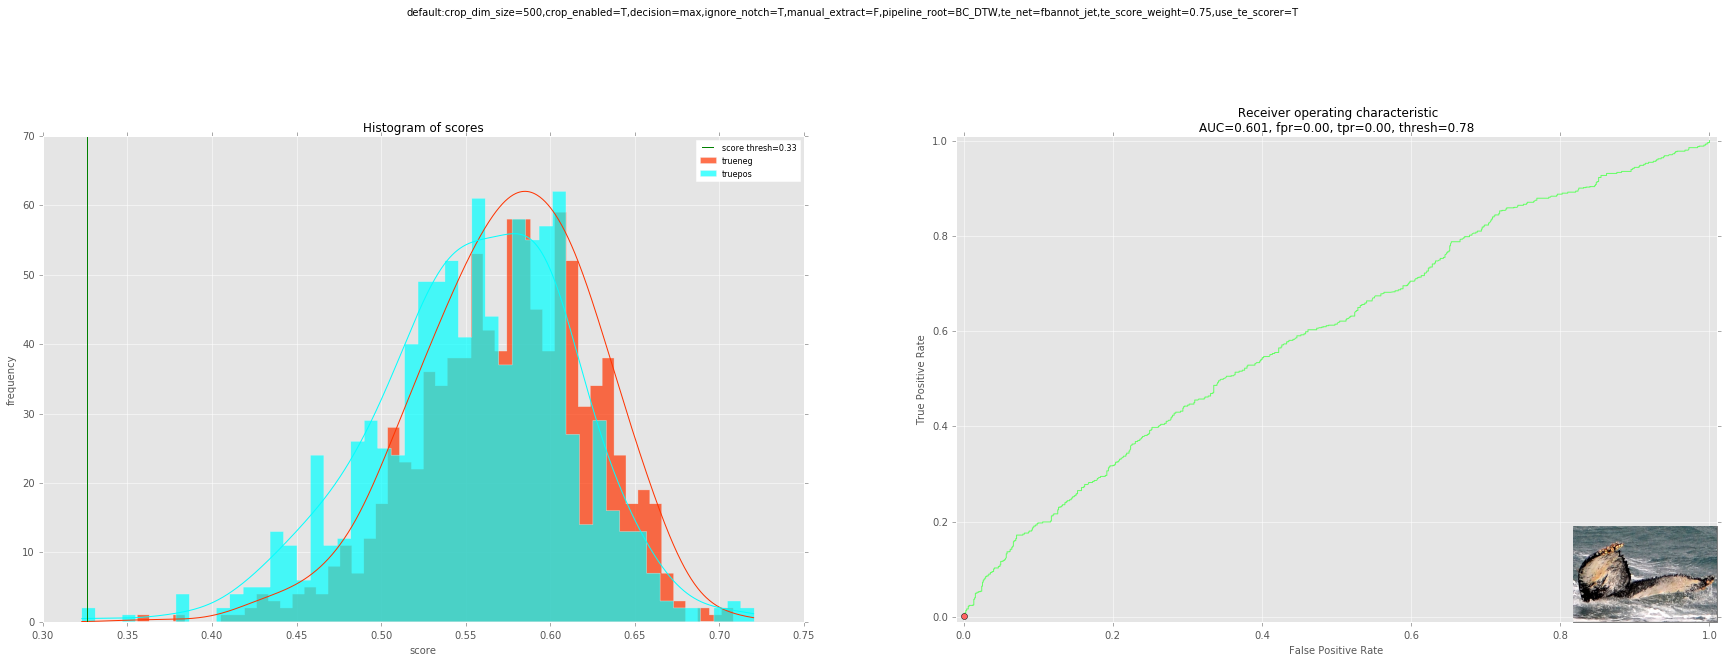

In [12]:
testres = ibeis.run_experiment(
    e='scores',
    db=db, a=a[0:1], t=t[0:1],
    qaid_override=qaid_override, daid_override=daid_override,
    f=[':fail=None,min_gf_timedelta=None'],
    verbose=True
)
_ = testres.draw_func()
fix_figsize()
testres.draw_taghist()()
fix_figsize()

# Scores of Success Cases

# Cases: Top Success Cases

In [ ]:
testres = ibeis.run_experiment(
    e='draw_cases',
    db=db, a=a[0:1], t=t,
    f=[':fail=False,index=0:3,sortdsc=gtscore,max_pername=2,allcfg=True'],
    figsize=(30, 8),
    **draw_case_kw)

_ = testres.draw_func()

# Cases: Challenging Success Cases

In [ ]:
testres = ibeis.run_experiment(
    e='draw_cases',
    db=db, a=a[0:1], t=t,
    f=[':fail=False,index=0:3,sortasc=gtscore,max_pername=2,allcfg=True'],
    figsize=(30, 8),
    **draw_case_kw)

_ = testres.draw_func()

# Cases: Failure (false pos)

In [ ]:
testres = ibeis.run_experiment(
e='draw_cases',
db=db, a=a[0:1], t=t,
f=[':fail=True,index=5:9,sortdsc=gfscore,max_pername=2,allcfg=True'],
figsize=(30, 8),
**draw_case_kw)
_ = testres.draw_func()

# Cases: Failure (false neg)

In [ ]:
testres = ibeis.run_experiment(
    e='draw_cases',
    db=db, a=a[0:1], t=t,
    f=[':fail=True,index=0:3,sortdsc=gtscore,max_pername=2,allcfg=True'],
    figsize=(30, 8),
    **draw_case_kw)
_ = testres.draw_func()

In [ ]:
# This shows individual examples where the tested configurations disagree.
# This only works if more than one configuration was specified.
testres = ibeis.run_experiment(
     e='draw_cases',
     db=db, a=a, t=t,
     f=[':disagree=True,index=3:6'],
     figsize=(30, 8),
     **draw_case_kw)

_ = testres.draw_func()


In [ ]:
# DISABLE_DOCTEST
from ibeis_flukematch.plugin import *  # NOQA
ibs = ibeis.opendb(defaultdb='humpbacks')
all_aids = ibs.get_valid_aids()
isvalid = ibs.depc.get_property('Has_Notch', all_aids, 'flag')
aid_list = ut.compress(all_aids, isvalid)
#print('aid_list = %r' % (aid_list,))
depc = ibs.depc
config = {'n_neighbors': 5, 'crop_enabled': True, 'crop_dim_size':1000, 'ignore_notch':False, 'use_te_scorer':True,
          'te_score_weight':0.5,'te_net':'fbannot_jet'}
cpid_list = ibs.depc.get_rowids('Cropped_Chips', aid_list, config)
propgen = preproc_trailing_edge(depc, cpid_list, config)
results = list(propgen)
tedge_list, cost_list, score_pred_list = list(zip(*results))
#print('tedge_list = %r' % (tedge_list,))
#print('cost_list = %r' % (cost_list,))
ut.quit_if_noshow()
# Visualize
#aid_list = [2826]
#chipcfg = ibeis.algo.preproc.preproc_chip.ChipConfig(dim_size=None)
chips = depc.get_property('Cropped_Chips', aid_list, 'img', config=config, _debug=True)
notches = depc.get_property('Cropped_Chips', aid_list, ('notch', 'left', 'right'), config=config, _debug=True)
overlay_chips = [overlay_fluke_feats(np.copy(chip), path, tips=tips) for chip, path, tips in zip(chips, tedge_list, notches)]



In [ ]:
import plottool as pt
%matplotlib inline
rand_ind = np.random.randint(len(overlay_chips))
pt.gcf().set_size_inches((15,15))
pt.imshow(overlay_chips[rand_ind], pnum=311)
print(aid_list[rand_ind])
print(score_pred_list[rand_ind].shape)
pt.imshow(chips[rand_ind], pnum=312)
pt.imshow((score_pred_list[rand_ind] < 0.5) * 255, pnum=313)
#iteract_obj = pt.interact_multi_image.MultiImageInteraction(overlay_chips, nPerPage=4)
#iteract_obj.start()
#pt.show_if_requested()

In [ ]:
# problem aids:
# note: 379 snaps to the horizon, which the TE scorer labels some of as TE...
aid_bad_te = [2076, 3370, 379, 3953, 3372]